In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import batt_cycle

Develop a function that will return data for a single cycle or a range of cycles

define cycle_range_data(start_cycle, end_cycle, df, cycle_indeces):  
- define list of cylce numbers  
- iterate through list, appending data to new dataframe  
return dataframe containing only data within the cycle range  

In [4]:
# folder holding data of interest
folder = '../Data/Li-Li/Data_2_7_19/'

# imports and concatenates the data for each of the 10 symmetric cells
PP_A_0 = batt_cycle.import_data(folder + '_002_4.xls', 3)
# cleans and preps dataframes
PP_A, PP_A_break = batt_cycle.clean_prep_break(PP_A_0)
# reshapes the index data
cycle_indeces = batt_cycle.reshape_cycle_indeces(PP_A, PP_A_break)

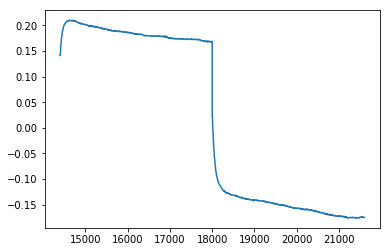

In [46]:
df = PP_A
cycle_indeces = cycle_indeces

start_cycle = 1
end_cycle = None


if end_cycle == None:
    cycle_list = [start_cycle]
    cycle_range_data = df[df.index.isin(cycle_indeces[start_cycle][0])]
    cycle_range_data = pd.concat([cycle_range_data,
                                  df[df.index.isin(cycle_indeces[start_cycle][1])]])
else:
    cycle_list = np.arange(start_cycle+1, end_cycle+1)
    # initialize dataframe with start_cycle
    cycle_range_data = df[df.index.isin(cycle_indeces[start_cycle][0])]
    cycle_range_data = pd.concat([cycle_range_data,
                                  df[df.index.isin(cycle_indeces[start_cycle][1])]])
    # append data for all other cycles
    for i in cycle_list:
        charge_data = df[df.index.isin(cycle_indeces[i][0])]
        cycle_range_data = pd.concat([cycle_range_data, charge_data])
        discharge_data = df[df.index.isin(cycle_indeces[i][1])]
        cycle_range_data = pd.concat([cycle_range_data, discharge_data])

plt.plot(cycle_range_data['time_sec'], cycle_range_data['voltage'])

In [23]:
type(cycle_range_data)

pandas.core.frame.DataFrame

In [34]:
cycle_range_data

,index,time,voltage,current,capacity,state,time_sec
3384,3367,08:00:00,-0.0443,0.3819,0,C_CC,28800
3385,3368,08:00:06,-0.0443,0.3819,0.0006,C_CC,28806
3386,3369,08:00:11,-0.0192,0.3819,0.0012,C_CC,28811
3387,3370,08:00:16,-0.0087,0.3819,0.0017,C_CC,28816
3388,3371,08:00:21,0.004,0.3819,0.0022,C_CC,28821
3389,3372,08:00:26,0.0167,0.3819,0.0028,C_CC,28826
3390,3373,08:00:31,0.022,0.3819,0.0033,C_CC,28831
3391,3374,08:00:36,0.0313,0.3819,0.0038,C_CC,28836
3392,3375,08:00:41,0.0397,0.3819,0.0043,C_CC,28841
3393,3376,08:00:46,0.045,0.3819,0.0049,C_CC,28846


In [53]:
df = PP_A
cycle_indeces = cycle_indeces

start_cycle = 1
end_cycle = None

def cycle_range_data(df, cycle_indeces, start_cycle, end_cycle=None):
    """
    Function that takes the output of clean_prep_break
    and reshape_cycle_indeces, as well as a range in the
    form of start_cycle/end_cycle. end_cycle defaults to None
    if only a single cycle is called.
    Returns:
        cycle_range_data, a dataframe that contains all the data
        within the specified range
        label, a string label of the output cycle range for plotting
    """
    if end_cycle == None:
        cycle_list = [start_cycle]
        range_data = df[df.index.isin(cycle_indeces[start_cycle][0])]
        range_data = pd.concat([range_data,
                                      df[df.index.isin(cycle_indeces[start_cycle][1])]])
        label = 'Cylce {}'.format(start_cycle)
    else:
        cycle_list = np.arange(start_cycle+1, end_cycle+1)
        # initialize dataframe with start_cycle
        range_data = df[df.index.isin(cycle_indeces[start_cycle][0])]
        range_data = pd.concat([range_data,
                                      df[df.index.isin(cycle_indeces[start_cycle][1])]])
        # append data for all other cycles
        for i in cycle_list:
            charge_data = df[df.index.isin(cycle_indeces[i][0])]
            range_data = pd.concat([range_data, charge_data])
            discharge_data = df[df.index.isin(cycle_indeces[i][1])]
            range_data = pd.concat([range_data, discharge_data])
        label = 'Cylces {} to {}'.format(start_cycle, end_cycle)
    return range_data, label

Text(0.5, 1.0, 'Li-Li Symmetric Cell (PP_A) Cylces 1 to 10')

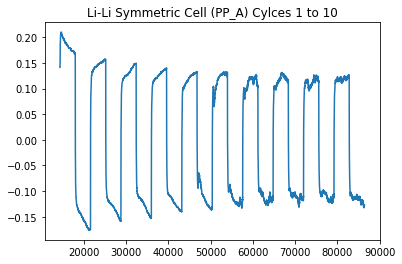

In [61]:
# plotting a range
df = PP_A
cycle_indeces = cycle_indeces

start_cycle = 1
end_cycle = 10

range_data, label = cycle_range_data(df, cycle_indeces, start_cycle, end_cycle)
plt.plot(range_data['time_sec'], range_data['voltage'])
plt.title('Li-Li Symmetric Cell (PP_A) '+label)

Text(0.5, 1.0, 'Li-Li Symmetric Cell (PP_A) Cylce 96')

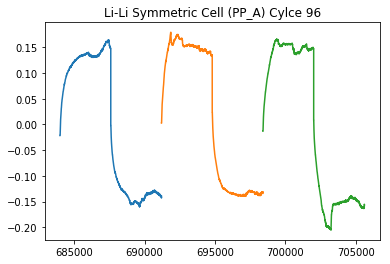

In [67]:
# plotting a single cycle
df = PP_A
cycle_indeces = cycle_indeces

start_cycle = 95

range_data1, label = cycle_range_data(df, cycle_indeces, start_cycle-1)
range_data2, label = cycle_range_data(df, cycle_indeces, start_cycle)
range_data3, label = cycle_range_data(df, cycle_indeces, start_cycle+1)
plt.plot(range_data1['time_sec'], range_data1['voltage'])
plt.plot(range_data2['time_sec'], range_data2['voltage'])
plt.plot(range_data3['time_sec'], range_data3['voltage'])
plt.title('Li-Li Symmetric Cell (PP_A) '+label)

to do:  
function could definitely be written to take either one argument or two for 'range'. Then len()=1 can be used to test for single cycle and len()=2 can be used to test for a range.  
I also don't know what will happen if start_cycle is smaller then end_cycle